<img src='./imgs/img.jpg' vspace='15px' hspace='15px'/>
<h1><center>GASTOS DE SENADORES BRASILEIROS</center></h1>
<h2>Uma breve conjectura</h2>

Que a corrupção está entranhada em nosso modelo de governo, isso não é novidade para ninguém. Há quem diga que ela começa no povo - de onde vem os candidatos -, quando você comete injustiças angariando seu próprio bem, como sonegar impostos; não pagar por serviços como água e luz; e utilizar camiseta de estudantes para não pagar a passagem. Todavia, há quem diga que o homem começa a se corromper quando lhe é dado poder. Quando lhe é dado a possibilidade de realizar escolhas que influenciarão na vida de terceiros.

Independente da forma exata com que nossos representantes tem se corrompido, é um direito do cidadão de bem monitorar e auditar o que é feito com o dinheiro utilizado por nossos políticos. Graças aos <a href='https://www12.senado.leg.br/transparencia/dados-abertos/dados-abertos-ceaps'>dados abertos do CEAPS</a> e outras ações da <a href='http://www.leidatransparencia.cnm.org.br/'>Lei da Transparência</a>, é possível a qualquer um avaliar e verificar o que eles tem feito.

Através deste projeto, quero gerar <i>Insights</i> a partir dos dados disponíveis no portal do Senado Federal, onde poderemos verificar informações a cerca dos gastos públicos realizados por senadores no período de 01/01/2016 a 05/10/2016. Boa leitura.

<blockquote><i> “De tanto ver triunfar as nulidades; de tanto ver prosperar a desonra, de tanto ver crescer a injustiça. De tanto ver agigantarem-se os poderes nas mãos dos maus, o homem chega a desanimar-se da virtude, a rir-se da honra e a ter vergonha de ser honesto.”</i> - Ruy Barbosa</blockquote>

<h2>Apresentando a informação</h2>

Na seção "Transparência" no<a href='https://www12.senado.leg.br/transparencia/dados-abertos/dados-abertos-ceaps'> site do Senado Federal</a>, é possível localizar os dados da CEAPS - Cota para o Exercício da Atividade Parlamentar dos Senadores -, que, nada mais é que um valor provisionado para cada senador poder usufruir no exercício de sua função. O valor da cota depende da unidade da federação que o deputado representa. Essa variação ocorre por causa das passagens aéreas e está relacionada ao valor do trecho entre Brasília e o Estado que o deputado representa. Tal valor é discutido no <a href='http://www2.camara.leg.br/legin/int/atomes/2009/atodamesa-43-21-maio-2009-588364-norma-cd-mesa.html'>Ato da Mesa nº 43 de 2009</a>.

Você pode consultar tais valores <a href='./data/CEAPS.pdf'>clicando neste link</a> (data de referência: 02/11/2016).

Neste projeto, estarei utilizando o arquivo do CEAPS de 2016, baixado em 05/10/2016. Você pode realizar o download deste arquivo <a href='./data/2016.csv'>clicando aqui</a>.

<h2>Disclaimer</h2>

O <i>storytelling</i> deste estudo foi baseada na proposta de permitir a qualquer pessoa consiguir compreender os dados exibidos e meu <i>modus operandi</i>. Caso você já tenha conhecimento técnico em Python e Data Science, desconsidere comentários que possam ser fúteis, devido você já possuir o conhecimento.

<a name='TOPO'></a>
<h1>Índice</h1>
<ol>
<li><a href='#DATACLEANING'>Limpeza de Dados (Data Cleaning)</a></li>
<li><a href='#DATAANALYSIS'>Análise dos Dados (Data Analysis)</a></li>
<li><a href='#DATAVISUALIZATION'>Visualização dos Dados (Data Visualization)</li>
<li><a href='#CONCLUSAO'>Conclusão</li>
</ol>

<a name='DATACLEANING'></a>
<h1>Limpeza de Dados (Data Cleaning)</h1>

Que a planilha contém muitos dados, isso é fato. Para podermos ter um melhor aproveitamento das informações disponibilizadas, precisamos realizar a conversão de alguns dados que foram importados incorretamente para o <i>script</i>. Abaixo, você poderá visualizar o código que escrevi, assim como a explicação de todo o processo.

<h2>Importando bibliotecas</h2>

In [8]:
%matplotlib inline
import pandas as pd # Para criarmos DataFrames
import numpy as np # Realizar alguns calculos matemáticos
import matplotlib.pyplot as plt # Para criação de gráficos
import seaborn as sns # Design de gráficos mais atraentes
import pandas_profiling as pf # Gerar relatório mais completo

In [11]:
# Vamos começar a leitura do nosso arquivo
gastos2018 = pd.read_csv('./data/2018.csv', sep=';', encoding='ISO-8859-1')

Para melhor visualização dos dados que estão contidos na planilha, abaixo você poderá conferir como estão dispostas tais informações:

In [12]:
gastos2018.head(3) # Três primeiras linhas do arquivo

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2018.0,1.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000
1,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99"
2,2018.0,1.0,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29"


Em alguns campos nesta planilha há dados inconsistentes que podem atrapalhar nossa análise, como o nome do senador não estar preenchido, ou o valor reembolsado não estar bem declarado. Vamos retirar esses valores de nosso DataFrame.

In [13]:
gastos2018 = gastos2018.dropna(subset=['VALOR_REEMBOLSADO'], axis=0) # Excluindo linhas que não possuem valor reembolsado
gastos2018 = gastos2018.dropna(subset=['SENADOR'], axis=0) # Excluindo linhas que não possuem o nome do senador

Perfeito, já não estão presentes em nosso DataFrame campos com valores inválidos. O próximo passo é analisar como os dados lançados no DataFrame estão sendo tratados pela biblioteca Pandas. Vamos ver?

In [14]:
gastos2018.dtypes

ANO                  float64
MES                  float64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO     object
dtype: object

Opa! Temos um problema aqui. Praticamente todos os dados em nosso dataset estão sendo tratados como se objetos do Python, ou simplesmente <i>object</i>, que trata os valores como se fossem <i>strings</i>, ou linhas de texto. Isso se deve ao arquivo disponibilizado pelo senado não estar codificado em UTF, mas sim em ISO.

Bem, uma linguagem de programação não consegue realizar cálculos matemáticos em textos - e acredito que nós, humanos, também não. Sendo assim, terei que converter algumas colunas para podermos trabalhar nela. Vamos lá!

In [15]:
# Primeiro, vou converter a coluna 'VALOR_REEMBOLSADO' de string para float. Devido os valores serem separados por uma vírgula,
# eu terei que substituir esse caracter por ponto para realizar cálculos matemáticos.
gastos2018['VALOR_REEMBOLSADO'] = gastos2018['VALOR_REEMBOLSADO'].str.replace(',','.').astype('float')

Vamos ver como ficou a tabela agora?

In [16]:
gastos2018.dtypes

ANO                  float64
MES                  float64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
dtype: object

Ótimo! Perceba que o campo <b>"VALOR_REEMBOLSADO"</b> foi convertido de <i>object</i> para <i>float</i>. Isso nos permitirá realizar cálculos, já que agora Python considera as informações ali como números.

Abaixo, vamos visualizar as informações de todas as colunas númericas para vermos se há algum valor indevido. O comando <i>describe</i> nos retorna informações como média, valor mínimo e máximo, quartis, dentre outras.

In [17]:
gastos2018.describe()

,ANO,MES,VALOR_REEMBOLSADO
count,23907.0,23907.000000,23907.000000
mean,2018.0,6.099887,1035.704512
std,0.0,3.258229,2544.357904
min,2018.0,1.000000,0.010000
25%,2018.0,3.000000,125.000000
50%,2018.0,6.000000,291.000000
75%,2018.0,9.000000,1034.765000
max,2018.0,12.000000,102000.000000


<a name="DATAANALYSIS"></a>
<a href='#TOPO'>Voltar ao índice</a>
<h1>Análise dos Dados (Data Analysis)</h1>

Bom, até o momento realizamos a limpeza em nossos dados para deixá-los melhores para realizar processos de cálculos e plotagem. A partir de agora, vamos realizar alguns <i>Insights</i> a partir das informações contidas nessa planilha.
Além de outras perguntas, queremos sanar os seguintes questionamentos:

<ol>
<li>Qual senador que mais gastou no período?</li>
<li>Qual senador que menos gastou neste período?</li>
<li>Algum senador estourou a cota do CEAPS?</li>
<li>Quais itens mais caros/comprados neste período?</li>
<li>Periodos como recessos e grandes eventos, como votação de Impeachment, influenciaram nos gastos públicos?</li>
</ol>

In [21]:
# Vamos começar verificando quanto cada parlamentar gastou do período de 01/01/2018 a 31/12/2018
gastos_politicos = {} # dicionário que vai armazenar cada político e seu respectivo gasto
nomes_politicos = gastos2018['SENADOR'].unique() # Nome de cada senador que aparece no arquivo

#Esses são alguns políticos contidos nesse arquivo
nomes_politicos[0:50]

array(['ACIR GURGACZ', 'AÉCIO NEVES', 'AIRTON SANDOVAL', 'ALVARO DIAS',
       'ANA AMÉLIA', 'ÂNGELA PORTELA', 'ANTONIO ANASTASIA',
       'ANTÔNIO CARLOS VALADARES', 'ARMANDO MONTEIRO', 'ATAÍDES OLIVEIRA',
       'BENEDITO DE LIRA', 'CÁSSIO CUNHA LIMA', 'CIDINHO SANTOS',
       'CIRO NOGUEIRA', 'CRISTOVAM BUARQUE', 'DALIRIO BEBER',
       'DÁRIO BERGER', 'DAVI ALCOLUMBRE', 'EDISON LOBÃO',
       'EDUARDO AMORIM', 'EDUARDO BRAGA', 'EDUARDO LOPES',
       'ELBER BATALHA', 'ELMANO FÉRRER', 'FÁTIMA BEZERRA',
       'FERNANDO BEZERRA COELHO', 'FERNANDO COLLOR', 'FLEXA RIBEIRO',
       'GARIBALDI ALVES FILHO', 'GIVAGO TENÓRIO', 'GLADSON CAMELI',
       'GLEISI HOFFMANN', 'GUARACY SILVEIRA', 'HÉLIO JOSÉ',
       'HUMBERTO COSTA', 'IONE GUIMARÃES', 'IVO CASSOL', 'JADER BARBALHO',
       'JOÃO ALBERTO SOUZA', 'JOÃO CAPIBERIBE', 'JORGE VIANA',
       'JOSÉ AGRIPINO', 'JOSÉ AMAURI', 'JOSÉ MARANHÃO', 'JOSÉ MEDEIROS',
       'JOSÉ PIMENTEL', 'JOSÉ SERRA', 'KÁTIA ABREU', 'LASIER MARTINS',
       'L

Já que possuímos agora os nomes dos políticos presentes no arquivo, vamos realizar um laço - <i>looping</i> - para visualizarmos quanto cada um gastou. O <i>loop for</i> abaixo irá criar uma chave no dicionário gastos_politicos - criado acima - e usará como valor desta chave a soma dos gasto do respectivo político. Acompanhe:

In [27]:
for i in nomes_politicos:
    i_nome = gastos2018[gastos2018['SENADOR'] == i] # Série criada somente onde o nome do atual senador aparece
    total_de_gastos = i_nome['VALOR_REEMBOLSADO'].sum() # Soma de todas as contas do senador
    gastos_politicos[i] = total_de_gastos # Criando chave e valor no dicionário, convertendo os totais para Real
    gastos_por_senador = pd.DataFrame.from_dict(gastos_politicos, orient='index') # Criando DataFrame com base no dicionário
    gastos_por_senador.columns = ['VALOR_REEMBOLSADO'] # Renomeando a coluna com valores

In [26]:
#Primeiras linhas do DataFrame criado
gastos_por_senador.head()

,VALOR_REEMBOLSADO
ACIR GURGACZ,314551.17
AÉCIO NEVES,246653.58
AIRTON SANDOVAL,307521.55
ALVARO DIAS,42807.30
ANA AMÉLIA,147226.50


<a name="DATAVISUALIZATION"></a>
<a href='#TOPO'>Voltar ao índice</a>
<H1>Visualização dos Dados (Data Visualization)</h1>

Hora de um dos momentos mais importantes desse projeto: visualizarmos os dados da planilha da CEAPS. Abaixo você irá conferir gráficos para melhor ilustramos as informações que estamos coletando aqui.

Inicialmente, vamos criar um gráfico com os 10 políticos que mais tiveram valor reembolsado no período abrangido por este arquivo.

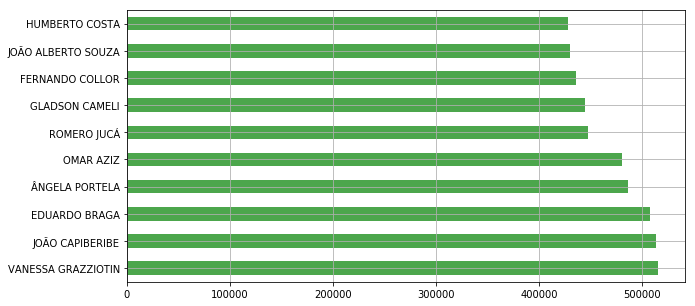

In [31]:
gastos_por_senador = gastos_por_senador.sort_values('VALOR_REEMBOLSADO',ascending=False) #Ordenando valores do DataFrame
gastos_por_senador.head(10).plot(kind='barh', figsize=(10,5), color='green', legend=False, grid=True, alpha=0.7) #Plotting
plt.show()

Senador Paulo Rocha aparenta ser o político que mais teve valores reembolsados no período abrangido por esse <i>dataset</i>. Vamor conferir seus maiores gastos?

In [32]:
sen_maior_gasto = gastos2018[gastos2018['SENADOR'] == 'PAULO ROCHA'].reset_index()
sen_maior_gasto.shape[0] # quantas linhas tem o arquivo

407

O senador Paulo Rocha tem, segundo o arquivo, 504 registros de contas lançados. Abaixo iremos começar a analisar em quais itens foram realizados os maiores gastos.

In [33]:
#Primeiras linhas do novo DataFrame
sen_maior_gasto.head(3)


,index,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,16204,2018.0,1.0,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",04.895.728/0001-80,Centrais Elétricas do Pará S.A,"2,02E+14",12/01/2018,NaN,1163.16
1,16205,2018.0,1.0,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",40.432.544/0241-60,Claro S.A.,30156,17/01/2018,NaN,172.25
2,16206,2018.0,1.0,PAULO ROCHA,"Aluguel de imóveis para escritório político, c...",40.432.544/0001-47,Claro S/A,4206,24/01/2018,NaN,35.87


### OBS - Esta análise foi realizada em cima dos dados do ano de 2016. Os dados que estão sendo analisados são relacionados ao ano de 2018.
As contas dos senadores são divididas em categorias, o que permite um melhor agrupamento das informações para nossa analise. Os tipos de categorias de contas existente, são:

<li>Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.</li>
<li>Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.</li>
<li>Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar</li>
<li>Locomoção, hospedagem, alimentação, combustíveis e lubrificantes</li>
<li>Passagens aéreas, aquáticas e terrestres nacionais</li>
<li>Divulgação da atividade parlamentar</li>
<li>Serviços de Segurança Privada</li>

Para facilitar essa e futuras análises de arquivos do CEAPS, criei uma função que pegará o nome de um senador contido no arquivo e retornará um DataFrame com os valores reembolsados agrupados em cada categoria em que ele está inserido.

In [34]:
#Vamos criar uma função que retorna um DataFrame com os valores gastos pelo senador
def gastos_categoria(senador):
    nome_senador = gastos2018[gastos2018['SENADOR'] == senador]
    nome_senador = nome_senador.groupby('TIPO_DESPESA')[['SENADOR','VALOR_REEMBOLSADO']].sum()
    return nome_senador

paulo_rocha_gastos = gastos_categoria('PAULO ROCHA')
paulo_rocha_gastos.sort_values(by='VALOR_REEMBOLSADO', ascending = False)


,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",133335.73
"Passagens aéreas, aquáticas e terrestres nacionais",122940.88
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",109758.35
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",15272.35
Divulgação da atividade parlamentar,12458.42
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",3376.55


Apenas em tópicos como locomoção e hospedagem, o senador Paulo Rocha gastou mais de R\$ 160 mil. Além disso, foram gastos mais de R\$ 130 mil em passagens, sejam elas aquáticas ou aéreas. Vamos verificar mais a fundo esses gastos.

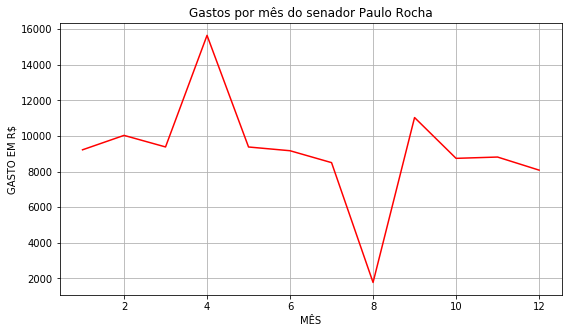

In [35]:
#Vamos acompanhar agora a quantidade de gastos do senador no decorrer do ano
spr_despesa = sen_maior_gasto[sen_maior_gasto['TIPO_DESPESA'] == 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes']
plot_spr_despesa = spr_despesa.groupby('MES')['VALOR_REEMBOLSADO'].sum()
plot_spr_despesa.plot(title='Gastos por mês do senador Paulo Rocha', color='red', figsize=(9,5),grid=True)
plt.ylabel('GASTO EM R$')
plt.xlabel('MÊS')
plt.show()

Um fato interessante: o senador Paulo Rocha esteve presente na sessão de julgamento da ex-presidente Dilma Rousseff no dia 29/08/2016. E como podemos ver no gráfico acima, este foi o mês em que ele menos teve despesas gastas até o momento.

Será que todos os senadores tiveram poucos gastos nesse período?

In [39]:
gastos_dos_senadores = gastos2018.groupby('MES')['VALOR_REEMBOLSADO'].sum() # Somando valores reembolsados e divindindo-os por mês
# Como o arquivo é referente o ano de 2018, então, está completo. Isso fez com que a linha abaixo fosse comentada.
#gastos_dos_senadores = gastos_dos_senadores.drop(10.0) # Retirando o mês 10, devido não estar completo ainda

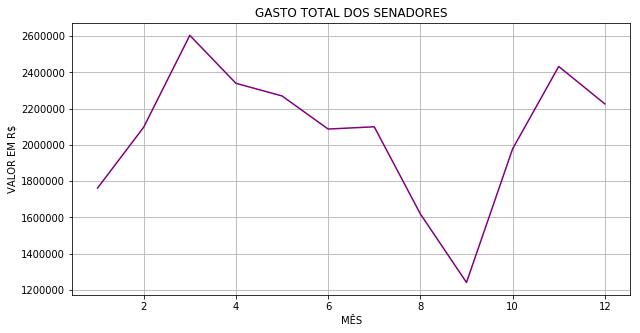

In [40]:
gastos_dos_senadores.plot(figsize=(10,5),color='purple',title='GASTO TOTAL DOS SENADORES',grid=True)
plt.ylabel('VALOR EM R$')
plt.xlabel('MÊS')
plt.show()


### Esta análise não deve ser observada com cuidado, pois foi feita com os dados do ano de 2016.

Pelo visto, foi apenas uma exceção do senador. O meses de Janeiro (1) e Setembro (9) foram os que menos houveram gastos, segundo este <i>dataset</i>. A propósito, percebam os gastos dos meses Julho (7) e Agosto (8). Do dia 18 a 29 de julho houve um recesso no senado,<a href='http://g1.globo.com/hora1/noticia/2016/07/camara-e-senado-entram-em-recesso-e-paralisam-trabalhos-ate-29-de-julho.html'> onde por duas semanas as atividades - como votações - foram interrompidas.</a> Todavia, os gastos que houveram em Julho foram quase os mesmos do período de Agosto, na última fase do processo de julgamento da afastada presidente Dilma Rousseff.

Bom, se não houveram trabalhos nesse período, com o que será que os senadores gastaram dinheiro? Eu não sei, mas vamos averiguar. O <i>statemente</i> abaixo irá pegar todos os valores reembolsados dentro do período de recesso.

/Users/ramirojunior/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: 'DATA' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


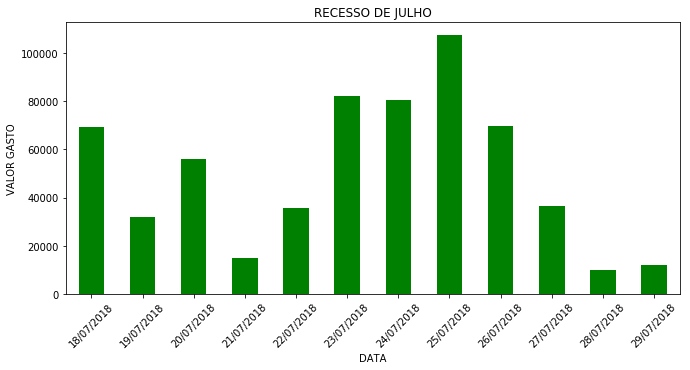

In [41]:
# Separando apenas valores do mês de Julho
gastos_em_julho=gastos2018[gastos2018['DATA'].str.endswith('07/2018')].sort_values('DATA',ascending=True).reset_index(drop=True)

# Lista com datas para eliminarmos do DataFrame
datas_para_eliminar = ['01/07/2018','02/07/2018','03/07/2018',
                       '04/07/2018','05/07/2018','06/07/2018',
                       '07/07/2018','08/07/2018','09/07/2018',
                       '10/07/2018','11/07/2018','12/07/2018',
                       '13/07/2018','14/07/2018','15/07/2018',
                       '16/07/2018','17/07/2018','30/07/2018',
                       '31/07/2018']
# Transformando a coluna DATA no index do DataFrame
gastos_em_julho.index = gastos_em_julho['DATA']
# Retirando contas que não foram lançadas entre 18/07 e 29/07
gastos_em_julho.drop(datas_para_eliminar, axis = 0, inplace = True)
# Agrupando os valores por data, somando os valores de cada data e criando um gráfico de barras
gastos_em_julho.groupby('DATA')['VALOR_REEMBOLSADO'].sum().plot(kind='bar', figsize=(11,5), title='RECESSO DE JULHO', color='green')
plt.ylabel('VALOR GASTO')
plt.xticks(rotation='45')
plt.show()

### Esses dados são referente ao ano de 2016.

Os dias 25/07/2016 e 29/07/2016 - segunda e terça-feira, respectivamente - possuem os maiores gastos com cerca de R$ 85 mil. Abaixo, você pode conferir quais foram os maiores gastos. 

In [42]:
gastos_em_julho = gastos_em_julho.sort_values('VALOR_REEMBOLSADO', ascending = False)
gastos_em_julho.head()


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
DATA,,,,,,,,,,
25/07/2018,2018.0,7.0,OMAR AZIZ,"Contratação de consultorias, assessorias, pesq...",22.793.293/0001-44,Jefferson L R Coronel - Me,17,25/07/2018,Serviços de consultoria em comunicação e marke...,30000.0
22/07/2018,2018.0,7.0,VANESSA GRAZZIOTIN,"Contratação de consultorias, assessorias, pesq...",20.189.519/0001-77,AGENCIA MOC E COMUNICAÇÃO LTDA,190,22/07/2018,COSULTORIA E TRABALHOS TECNICOS DE APOIO AO MA...,25000.0
23/07/2018,2018.0,7.0,RUDSON LEITE,"Locomoção, hospedagem, alimentação, combustíve...",710.075.541-77,FRANCISCO ELTON BASÍLIO ALMEIDA,2,23/07/2018,NaN,14000.0
24/07/2018,2018.0,6.0,FERNANDO COLLOR,"Contratação de consultorias, assessorias, pesq...",16.924.825/0001-32,Conlegis,123,24/07/2018,NaN,12000.0
24/07/2018,2018.0,5.0,FERNANDO COLLOR,"Contratação de consultorias, assessorias, pesq...",16.924.825/0001-32,Conlegis,124,24/07/2018,NaN,12000.0


Para melhor visualização, vamos criar um diagrama de caixas - do inglês <i>boxplot</i> - para sabermos a variação dos gastos dos senadores durante o recesso.

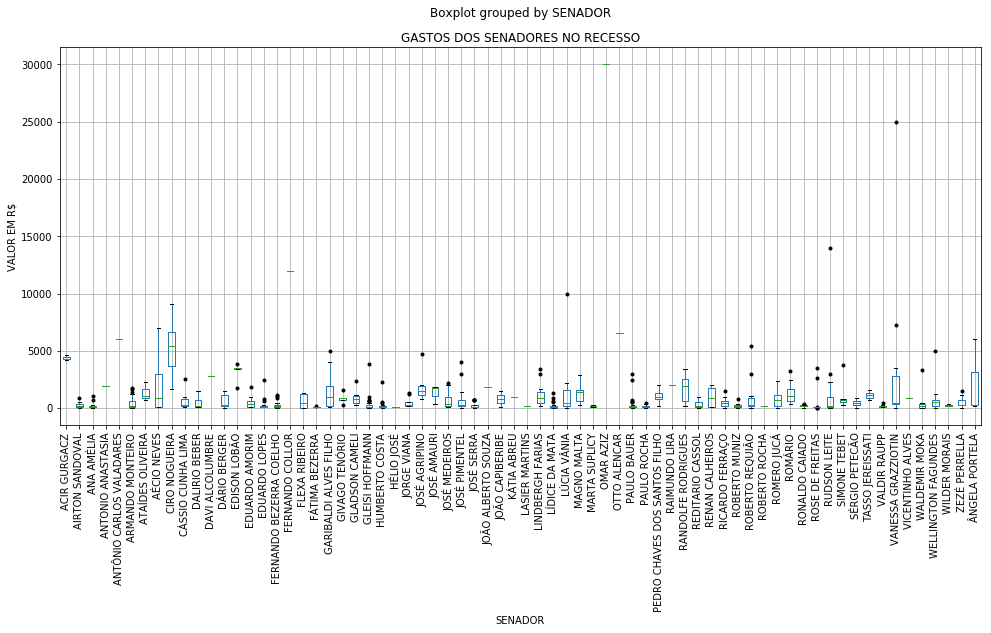

In [43]:
gastos_em_julho.boxplot(by='SENADOR', column='VALOR_REEMBOLSADO', rot=90, figsize=(16,7), sym='k. ')
plt.title('GASTOS DOS SENADORES NO RECESSO')
plt.ylabel('VALOR EM R$')
plt.show()


In [44]:
pf.ProfileReport(gastos2018)


Number of variables,11
Number of observations,23907
Total Missing (%),2.4%
Total size in memory,2.0 MiB
Average record size in memory,88.0 B
Numeric,3
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,1


Espero que você esteja familiarizado com gráficos de caixa e outros termos sobre estatística que irei comentar. Alguns senadores como Elmano Férrer, Randolfe Rodrigues, Otto Alencar e Roberto Muniz possuem alguns <i>Outliers</i>, ou seja, valores aberrantes que distorcem e fogem da média. Em nosso gráfico, eles são representados pontos abaixo e acima das caixas. Isso quer dizer que ali há algum valor que foge da série de dados encontrados para cada senador.

Como pode ser visto no Dataframe anteriormente, tais <i>Outliers</i> são devidos a contas com valores altos, que fogem do padrão do senador, como o aluguel de um Táxi Aéreo para o senador Gladson Cameli (do Acre), da consultoria da empresa Sedna Comunicação para a senadora Ângela Portela (Ceará).

<a name='CONCLUSAO'></a>
<a href='#TOPO'>Voltar ao índice</a>
<h1>Conclusão</h1>

Espero ter atingido a proposta deste estudo através dos meus métodos e explicações realizados aqui. Meu principal objetivo é denotar que qualquer cidadão tem poder - e dever - de fiscalizar e realizar questionamentos sobre o que tem feito os senadores que representam nossos estados, tudo isso utilizando técnicas de programação e dados abertos disponibilizados a todos.

Caso tenha interesse, você pode me seguir nas redes sociais, <a href='https://medium.com/paulo-henrique-vasconcellos'>além de visitar meu site oficial</a> e enviar críticas e sugestões. Espero que tenham apreciado este trabalho tanto quanto eu. Obrigado.

<img src = './imgs/linkedin.png' width=32 align=left><a href='https://br.linkedin.com/in/paulovasconcellos'>Paulo Henrique Vasconcellos</a><p>
<img src = './imgs/twitter.png' width=34 align=left><a href='https://twitter.com/paulo_zip'>paulo_zip</a><p>
